In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt


In [2]:
landauSSOR  = pd.read_csv('data_ssor/FieldLandau_4_manager.csv', header=0, sep=' ', names=['time', 'Ex field energy', 'Ex max norm'], 
                        usecols=['time', 'Ex field energy'], dtype=np.float64)
landauGS  = pd.read_csv('data_gauss-seidel/FieldLandau_4_manager.csv', header=0, sep=' ', names=['time', 'Ex field energy', 'Ex max norm'], 
                        usecols=['time', 'Ex field energy'], dtype=np.float64)
landauRichardson  = pd.read_csv('data_richardson/FieldLandau_4_manager.csv', header=0, sep=' ', names=['time', 'Ex field energy', 'Ex max norm'], 
                        usecols=['time', 'Ex field energy'], dtype=np.float64)
landauCG  = pd.read_csv('data_CG/FieldLandau_4_manager.csv', header=0, sep=' ', names=['time', 'Ex field energy', 'Ex max norm'], 
                        usecols=['time', 'Ex field energy'], dtype=np.float64)

γ=-0.3066
E_exact = 5.5*np.exp(γ*landauCG.get('time'))

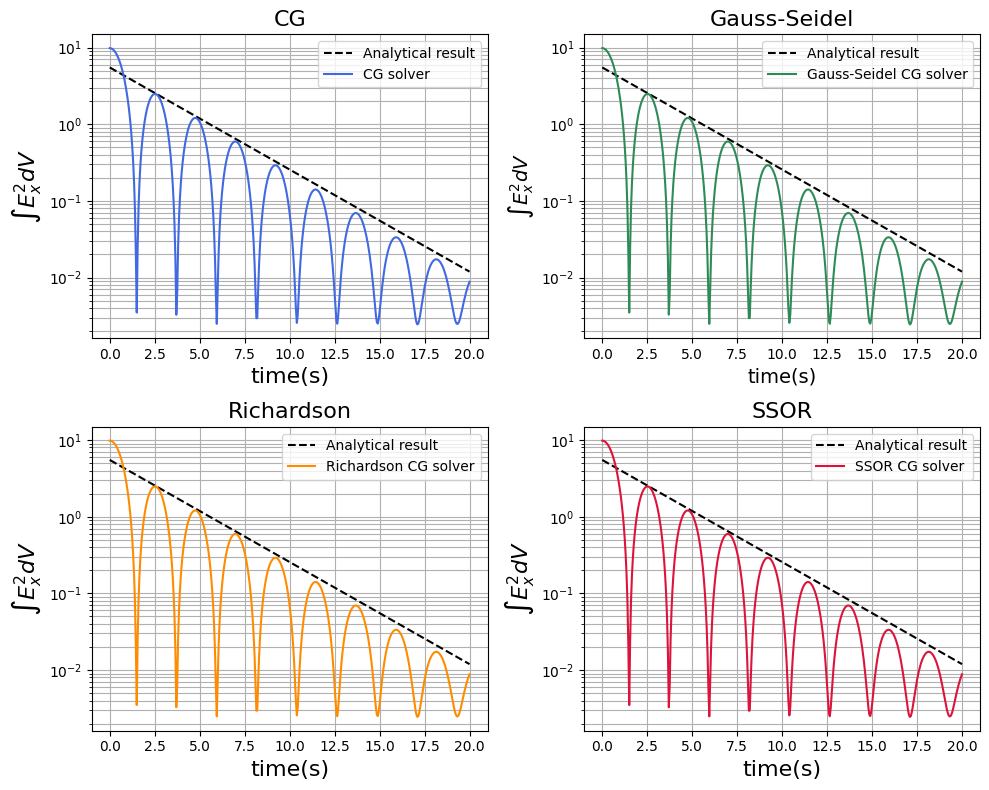

In [3]:


# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

colors = ['royalblue', 'seagreen', 'darkorange','crimson']
an_color = 'black'

# Plot the graph explicitly on each subplot
axes[0, 0].plot(np.array(landauCG.get('time')), np.array(E_exact),color=an_color,linestyle='--' ,label='Analytical result')
axes[0, 0].plot((landauCG.get('time')), np.array(landauCG.get('Ex field energy')),color=colors[0] , label='CG solver')
axes[0, 0].set_ylabel(r'$\int{E^2_{x}}dV$', fontsize=16)
axes[0, 0].set_xlabel('time(s)', fontsize=16)
axes[0, 0].grid('True', which='both')
axes[0, 0].set_yscale('log')
axes[0, 0].set_title("CG", fontsize=16)
axes[0, 0].legend()

axes[0, 1].plot(np.array(landauCG.get('time')), np.array(E_exact),color=an_color,linestyle='--' , label='Analytical result')
axes[0, 1].plot(np.array(landauGS.get('time')), np.array(landauGS.get('Ex field energy')),color=colors[1] , label='Gauss-Seidel CG solver')
axes[0, 1].set_ylabel(r'$\int{E^2_{x}}dV$', fontsize=14)
axes[0, 1].set_xlabel('time(s)', fontsize=14)
axes[0, 1].grid('True', which='both')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title("Gauss-Seidel", fontsize=16)
axes[0, 1].legend()

axes[1, 0].plot(np.array(landauCG.get('time')), np.array(E_exact),color=an_color,linestyle='--' , label='Analytical result')
axes[1, 0].plot(np.array(landauRichardson.get('time')), np.array(landauRichardson.get('Ex field energy')),color=colors[2] , label='Richardson CG solver')
axes[1, 0].set_ylabel(r'$\int{E^2_{x}}dV$', fontsize=16)
axes[1, 0].set_xlabel('time(s)', fontsize=16)
axes[1, 0].grid('True', which='both')
axes[1, 0].set_yscale('log')
axes[1, 0].set_title("Richardson", fontsize=16)
axes[1, 0].legend()

axes[1, 1].plot(np.array(landauCG.get('time')), np.array(E_exact),color=an_color,linestyle='--' , label='Analytical result')
axes[1, 1].plot(np.array(landauSSOR.get('time')), np.array(landauSSOR.get('Ex field energy')),color=colors[3] , label='SSOR CG solver')
axes[1, 1].set_ylabel(r'$\int{E^2_{x}}dV$', fontsize=16)
axes[1, 1].set_xlabel('time(s)', fontsize=16)
axes[1, 1].grid('True', which='both')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title("SSOR", fontsize=16)
axes[1, 1].legend()

#fig.suptitle("Correctness of LandauDamping (32³,83886080, 0.05)", fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig('LandauDamping_Correctness_All.pdf',bbox_inches='tight',dpi=600)

# Show the plots
plt.show()
